In [ ]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00


In [ ]:
import os
from datasets import load_dataset
import csv
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import datasets
from datasets import Dataset
import pandas as pd

In [ ]:
img_dir = '/content/drive/MyDrive/Datasets/dataset_ecommerce/train/image'

canny_image_dir = "/content/drive/MyDrive/Datasets/dataset_ecommerce/train/conditioning_image"

text_dir_path = "/content/drive/MyDrive/Datasets/text/text_file.txt"

text_data_list = []

for i, data in enumerate(dataset['train']):
    nparr = np.array(data['image'])

    img = cv2.cvtColor(nparr, cv2.COLOR_RGB2BGR)

    canny_img = get_canny_image(img)

    img_path = os.path.join(img_dir, f'image_{i+1}.png')

    canny_img_path = os.path.join(canny_image_dir, f'canny_image_{i+1}.png')

    cv2.imwrite(img_path, img)

    cv2.imwrite(canny_img_path, canny_img)

    text_data_list.append(data['text'])

with open(text_dir_path, "w") as file:
  for line in text_data_list:
    file.write(line + "\n")

In [ ]:
def middle_path(img_path, image_names):
  image_paths = []
  for i in range(len(image_names)):
    image_path = os.path.join(img_path, image_names[i])
    image_paths.append(image_path)
  return image_paths

In [ ]:
metadata_file_path = "/content/drive/MyDrive/Datasets/dataset_ecommerce/train/metadata.csv"
dataset_path = "/content/drive/MyDrive/Datasets/dataset_ecommerce"


In [ ]:
dataset_train_path = os.path.join(dataset_path, os.listdir(dataset_path)[0])
dataset_train_path

'/content/drive/MyDrive/Datasets/dataset_ecommerce/train'

In [ ]:
image_names = os.listdir(os.path.join(dataset_train_path, os.listdir(dataset_train_path)[0]))
image_names = middle_path("image", image_names)
# image_names = os.listdir(dataset_train_path)
image_names[:5]

['image/image_1.png',
 'image/image_2.png',
 'image/image_3.png',
 'image/image_4.png',
 'image/image_5.png']

In [ ]:
conditioned_image_names = os.listdir(os.path.join(dataset_train_path, os.listdir(dataset_train_path)[1] if os.listdir(dataset_train_path)[1] == "conditioning_image" else None))
# conditioned_image_names = os.listdir(os.path.join(dataset_train_path, os.listdir(dataset_train_path)[1]))
# print(conditioned_image_names)
conditioned_image_names = middle_path("conditioning_image", conditioned_image_names)
conditioned_image_names[:5]

['conditioning_image/canny_image_1.png',
 'conditioning_image/canny_image_2.png',
 'conditioning_image/canny_image_3.png',
 'conditioning_image/canny_image_4.png',
 'conditioning_image/canny_image_5.png']

In [ ]:
# text_data_path = "/content/drive/MyDrive/Datasets/dataset_ecommerce/train/text/text_file.txt"
text_data_path = "/content/drive/MyDrive/Datasets/text/text_file.txt"
text_data = []

with open(text_data_path, "r") as file:
  for line in file:
    line = line.strip()
    text_data.append(line)

In [ ]:
text_data[:5]

['outer, Stone Island 40723 Membrana 3L TC Hooded Jacket Sage Green - 23SS, a photography of a green jacket with a hood and zippers',
 'outer, House of Sunny Day Tripper Canvas Bomber, a photography of a blue jacket with a white logo on the front',
 'top,  Glowny Valen V-cut Long Sleeve T-Shirt Black, a photography of a black top with a long sleeve and a triangle cut',
 'bottom, C.P. Company Eco-Chrome R Utility Swim Shorts Ivy Green - 23SS, a photography of a man wearing a green shorts with a black patch',
 'bottom, Jacquemus Le De Nimes Fresa Straight Jeans Beige Terracotta, a photography of a pair of beige pants with a white background']

In [ ]:
file_data = []
for img_name, conditoned_img, prompt in zip(image_names, conditioned_image_names, text_data):
  f_data = [img_name, conditoned_img, prompt]
  file_data.append(f_data)

In [ ]:
with open(metadata_file_path, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["file_name", "conditioning_image", "text"])
    writer.writerows(file_data)

print("CSV file created successfully")

CSV file created successfully: pokemon_descriptions.csv


In [ ]:
def get_canny_image(image, low_threshold = 100, high_threshold = 200):
  canny_image = cv2.Canny(image, low_threshold, high_threshold)
  return canny_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
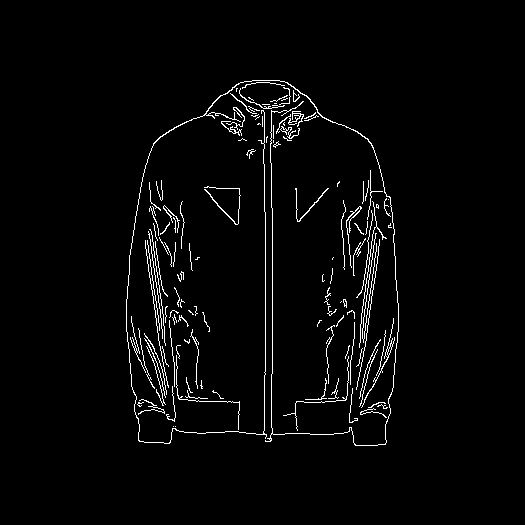

In [ ]:
canny_image

In [ ]:
def plot_multiple_images(images, rows, cols):

  fig, axes = plt.subplots(rows, cols, figsize=(20, 4))
  if rows == 1:
    axes = axes.flatten()
  elif cols == 1:
    axes = axes.reshape(-1)

  for i, (ax, image) in enumerate(zip(axes, images)):
    if isinstance(image, str):
      ax.imshow(plt.imread(image), cmap='gray')
    else:
      ax.imshow(image, cmap='gray')
    ax.set_axis_off()

  fig.suptitle(f"Grid of {num_images} Images", fontsize=12)
  plt.tight_layout()
  plt.show()


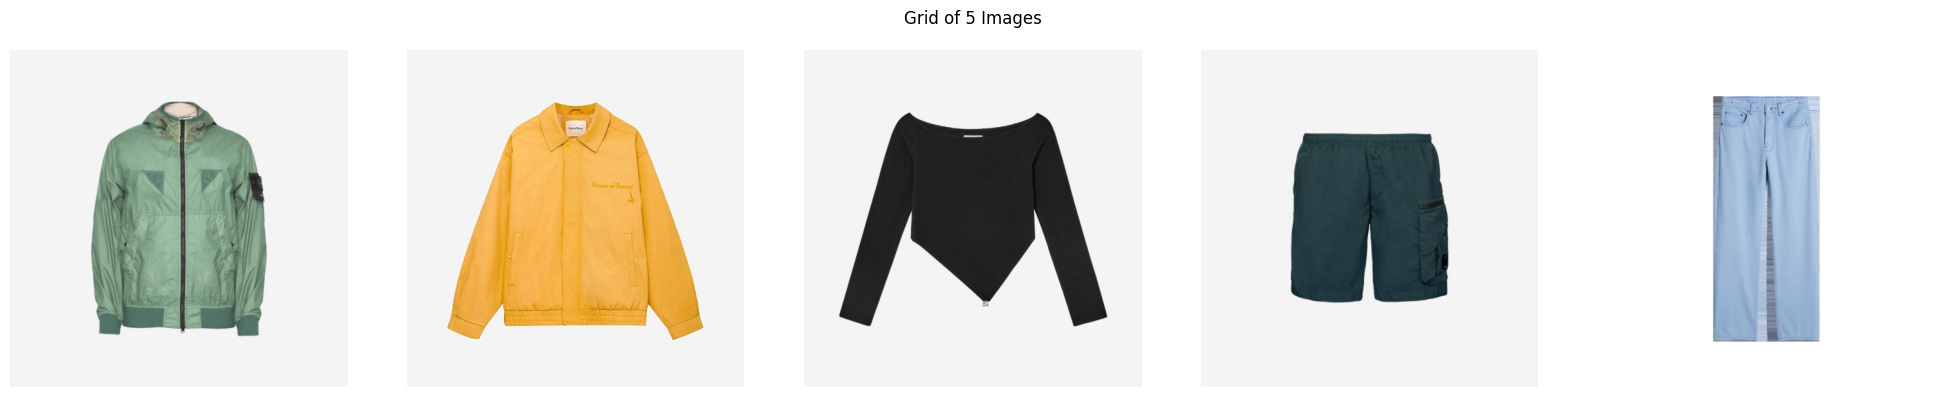

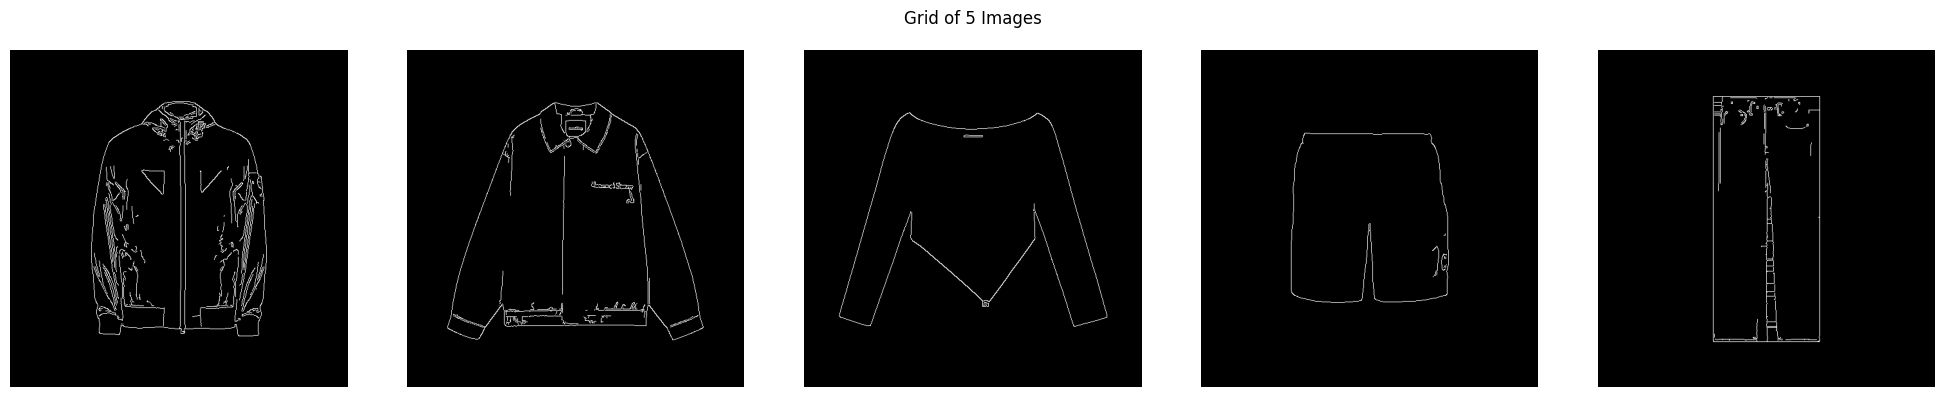

In [ ]:
plot_multiple_images(ori_imgs, rows=1, cols=5)
plot_multiple_images(canny_imgs, rows=1, cols=5)

In [ ]:
metadata_csv_path = "/content/drive/MyDrive/Datasets/dataset_ecommerce/train/metadata.csv"


# Step 1: Read CSV file
metadata_df = pd.read_csv(metadata_csv_path)
metadata_df

,file_name,conditioning_image,text
0,image/image_1.png,conditioning_image/canny_image_1.png,"outer, Stone Island 40723 Membrana 3L TC Hoode..."
1,image/image_2.png,conditioning_image/canny_image_2.png,"outer, House of Sunny Day Tripper Canvas Bombe..."
2,image/image_3.png,conditioning_image/canny_image_3.png,"top, Glowny Valen V-cut Long Sleeve T-Shirt B..."
3,image/image_4.png,conditioning_image/canny_image_4.png,"bottom, C.P. Company Eco-Chrome R Utility Swim..."
4,image/image_5.png,conditioning_image/canny_image_5.png,"bottom, Jacquemus Le De Nimes Fresa Straight J..."
...,...,...,...
95,image/image_96.png,conditioning_image/canny_image_96.png,"outer, Moncler Gumiane Down Vest Pink - 23SS,..."
96,image/image_97.png,conditioning_image/canny_image_97.png,"top, Lacoste Golf Club Logo Point T-Shirt Blue..."
97,image/image_98.png,conditioning_image/canny_image_98.png,"top, Ader Error Flut Cropped T-Shirt Orange, ..."
98,image/image_99.png,conditioning_image/canny_image_99.png,"top, Stussy King of the World T-Shirt Pigment ..."


In [ ]:
metadata_df['conditioning_image'] = metadata_df['conditioning_image'].apply(lambda x: os.path.join(dataset_train_path, x))
metadata_df['file_name'] = metadata_df['file_name'].apply(lambda x: os.path.join(dataset_train_path, x))

In [ ]:
metadata_df

,file_name,conditioning_image,text
0,/content/drive/MyDrive/Datasets/dataset_ecomme...,/content/drive/MyDrive/Datasets/dataset_ecomme...,"outer, Stone Island 40723 Membrana 3L TC Hoode..."
1,/content/drive/MyDrive/Datasets/dataset_ecomme...,/content/drive/MyDrive/Datasets/dataset_ecomme...,"outer, House of Sunny Day Tripper Canvas Bombe..."
2,/content/drive/MyDrive/Datasets/dataset_ecomme...,/content/drive/MyDrive/Datasets/dataset_ecomme...,"top, Glowny Valen V-cut Long Sleeve T-Shirt B..."
3,/content/drive/MyDrive/Datasets/dataset_ecomme...,/content/drive/MyDrive/Datasets/dataset_ecomme...,"bottom, C.P. Company Eco-Chrome R Utility Swim..."
4,/content/drive/MyDrive/Datasets/dataset_ecomme...,/content/drive/MyDrive/Datasets/dataset_ecomme...,"bottom, Jacquemus Le De Nimes Fresa Straight J..."
...,...,...,...
95,/content/drive/MyDrive/Datasets/dataset_ecomme...,/content/drive/MyDrive/Datasets/dataset_ecomme...,"outer, Moncler Gumiane Down Vest Pink - 23SS,..."
96,/content/drive/MyDrive/Datasets/dataset_ecomme...,/content/drive/MyDrive/Datasets/dataset_ecomme...,"top, Lacoste Golf Club Logo Point T-Shirt Blue..."
97,/content/drive/MyDrive/Datasets/dataset_ecomme...,/content/drive/MyDrive/Datasets/dataset_ecomme...,"top, Ader Error Flut Cropped T-Shirt Orange, ..."
98,/content/drive/MyDrive/Datasets/dataset_ecomme...,/content/drive/MyDrive/Datasets/dataset_ecomme...,"top, Stussy King of the World T-Shirt Pigment ..."


In [ ]:
def load_image(path):
    image = Image.open(path)
    if image.mode != 'RGB':
      image = image.convert("RGB")
    return image

metadata_df['conditioning_image'] = metadata_df['conditioning_image'].apply(load_image)
metadata_df['file_name'] = metadata_df['file_name'].apply(load_image)

In [ ]:
metadata_df.head(2)

,file_name,conditioning_image,text
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=RGB size=525x525 a...,"outer, Stone Island 40723 Membrana 3L TC Hoode..."
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,<PIL.Image.Image image mode=RGB size=525x525 a...,"outer, House of Sunny Day Tripper Canvas Bombe..."


In [ ]:
dataset_dict = {
    "image": metadata_df['file_name'],
    "conditioning_image": metadata_df['conditioning_image'],
    "text": metadata_df['text']
}

dataset = Dataset.from_dict(dataset_dict)

In [ ]:
dataset

Dataset({
    features: ['image', 'conditioning_image', 'text'],
    num_rows: 100
})

In [ ]:
dataset[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=525x525>,
 'conditioning_image': <PIL.PngImagePlugin.PngImageFile image mode=L size=525x525>,
 'text': 'outer, Stone Island 40723 Membrana 3L TC Hooded Jacket Sage Green - 23SS, a photography of a green jacket with a hood and zippers'}

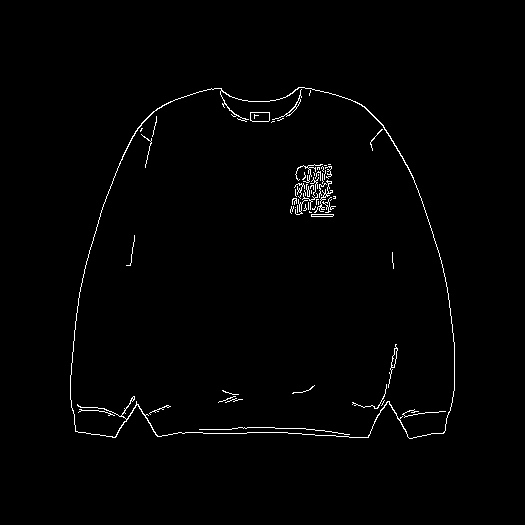

In [ ]:
dataset[99]['conditioning_image']

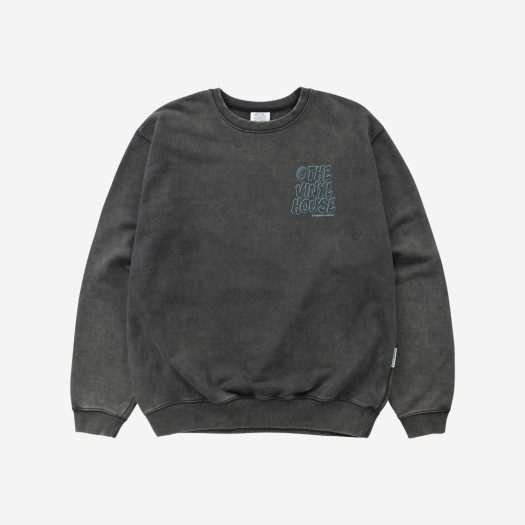

In [ ]:
dataset[99]['image']

In [ ]:
dataset[99]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=525x525>,
 'conditioning_image': <PIL.PngImagePlugin.PngImageFile image mode=L size=525x525>,
 'text': 'top, Thevinylhouse Bleach Logo Sweatshirts Charcoal, a photography of a black sweatshirt with a blue logo on the front'}

In [ ]:
dataset_dict = DatasetDict({"train": dataset})
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 100
    })
})

In [ ]:
dataset_dict['train'][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=525x525>,
 'conditioning_image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=525x525>,
 'text': 'outer, Stone Island 40723 Membrana 3L TC Hooded Jacket Sage Green - 23SS, a photography of a green jacket with a hood and zippers'}

In [ ]:
conditioned_image_path = "/content/drive/MyDrive/Datasets/dataset_for_controlnet"
dataset_dict.save_to_disk(conditioned_image_path)

Saving the dataset (0/1 shards):   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
conditioned_image_path = "/content/drive/MyDrive/Datasets/dataset_for_controlnet"

In [ ]:
load_dataset = datasets.load_from_disk(conditioned_image_path)
load_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'conditioning_image', 'text'],
        num_rows: 100
    })
})

In [ ]:
load_dataset['train'][:2]

{'image': [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=525x525>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=525x525>],
 'conditioning_image': [<PIL.PngImagePlugin.PngImageFile image mode=RGB size=525x525>,
  <PIL.PngImagePlugin.PngImageFile image mode=RGB size=525x525>],
 'text': ['outer, Stone Island 40723 Membrana 3L TC Hooded Jacket Sage Green - 23SS, a photography of a green jacket with a hood and zippers',
  'outer, House of Sunny Day Tripper Canvas Bomber, a photography of a blue jacket with a white logo on the front']}

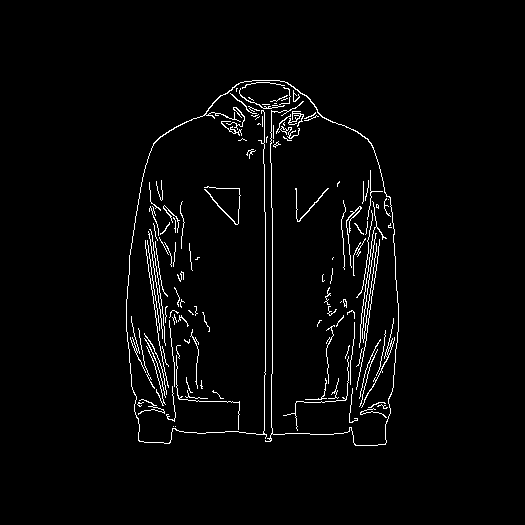

In [ ]:
load_dataset['train'][0]['conditioning_image']